In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

## Set up data for language model

In [3]:
path = Path('data/k_provision_classification')

In [4]:
path.ls()

[PosixPath('data/k_provision_classification/confidentiality_clauses.json'),
 PosixPath('data/k_provision_classification/indemnification_clauses.json'),
 PosixPath('data/k_provision_classification/assignment_clauses.json'),
 PosixPath('data/k_provision_classification/governing-law_clauses.json'),
 PosixPath('data/k_provision_classification/counterparts_clauses.json')]

In [5]:
pd.set_option('max_colwidth', -1)


In [6]:
counterparts = pd.read_json(path/'counterparts_clauses.json')

In [7]:
counterparts.head()

,snippet
0,"This Agreement may be executed in two or more counterparts, each of which shall be deemed an original, but all of which together shall constitute one and the same instrument.\n"
1,"This Agreement may be executed in any number of counterparts and by the parties hereto in separate counterparts, each of which when so executed shall be deemed to be an original and all of which taken together shall constitute one and the same agreement.\n"
2,"This Agreement may be executed in two or more counterparts, each of which shall be deemed an original, but all of which together shall constitute one and the same instrument. Delivery of an executed Agreement by one party to the other may be made by facsimile transmission.\n"
3,"This Agreement may be executed in separate counterparts, any one of which need not contain signatures of more than one party, but all of which taken together will constitute one and the same Agreement.\n"
4,"This Agreement may be executed in one or more counterparts, all of which shall be considered one and the same agreement and shall become effective when one or more counterparts have been signed by each of the parties and delivered to the other party, it being understood that all parties need not sign the same counterpart.\n"


In [8]:
counterparts.count()

snippet    1920
dtype: int64

In [9]:
counterparts['label'] = 'counterparts'

In [10]:
counterparts.head()

,snippet,label
0,"This Agreement may be executed in two or more counterparts, each of which shall be deemed an original, but all of which together shall constitute one and the same instrument.\n",counterparts
1,"This Agreement may be executed in any number of counterparts and by the parties hereto in separate counterparts, each of which when so executed shall be deemed to be an original and all of which taken together shall constitute one and the same agreement.\n",counterparts
2,"This Agreement may be executed in two or more counterparts, each of which shall be deemed an original, but all of which together shall constitute one and the same instrument. Delivery of an executed Agreement by one party to the other may be made by facsimile transmission.\n",counterparts
3,"This Agreement may be executed in separate counterparts, any one of which need not contain signatures of more than one party, but all of which taken together will constitute one and the same Agreement.\n",counterparts
4,"This Agreement may be executed in one or more counterparts, all of which shall be considered one and the same agreement and shall become effective when one or more counterparts have been signed by each of the parties and delivered to the other party, it being understood that all parties need not sign the same counterpart.\n",counterparts


In [12]:
confidentiality = pd.read_json(path/'confidentiality_clauses.json')
confidentiality['label'] = 'confidentiality'
confidentiality.head()

,snippet,label
0,"The Issuer hereby agrees to hold and treat all Confidential Information (as defined below) provided to it in connection with the offering of the Notes in confidence and in accordance with this Section 9.13, and will implement and maintain safeguards to further assure the confidentiality of such Confidential Information. Such Confidential Information will not, without the prior written consent of the Servicer, be disclosed or used by the Issuer or by its subsidiaries or, affiliates, or its or their directors, officers, employees, agents or controlling persons or agents or advisors (collectively, the ""Information Recipients"") other than for the purposes of (i) structuring the securitization transaction and facilitating the issuance of the Notes, or (ii) in connection with the performance of its required due diligence on the Receivables. Disclosure that is not in violation of the Right to Financial Privacy Act of 1978, as amended, the Gramm-Leach-Bliley Act of 1999, as amended, (the ""G-L-B Act"") or other applicable law by the Issuer of any Confidential Information at the request of its outside auditors or governmental regulatory authorities in connection with an examination of the Issuer by any such authority or for the purposes specified in above shall not constitute a breach of its obligations under this Section 9.13, and shall not require the prior consent of the Servicer. As used herein, ""Confidential Information"" means non-public personal information (as defined in the G-L-B Act and its enabling regulations issued by the Federal Trade Commission) regarding obligors on the Receivables that is identified as such by the Servicer. Confidential Information shall not include information which (i) is or becomes generally available to the public other than as a result of disclosure by the Issuer or any of its Information Recipients; (ii) was available to the Issuer on a non-confidential basis from a person or entity other than the Servicer prior to its disclosure to the Issuer; (iii) is requested to be disclosed by a governmental authority or related governmental, administrative, or regulatory or self-regulatory agencies having or claiming authority to regulate or oversee any aspect of the Issuer's business or that of its affiliates or is otherwise required by law or by legal or regulatory process to be disclosed; (iv) becomes available to the Issuer on a non-confidential basis from a person or entity other than the Servicer who, to the best knowledge of the ...\n",confidentiality
1,"Each Party understands that in connection with this transaction, it has been furnished and will be furnished Non-Public Personal Information and/or Personally Identifiable Financial Information (as those terms are defined in Sections 573.3(n) and (o) of the Office of Thrift Supervision Regulations on Privacy of Consumer Information published at 12 C.F.R. Chapter V implementing Title V of the Gramm-Leach-Bliley Act), and other information regarding the policies and plans of the other Party and its affiliates that is and has been designated as confidential and proprietary, and each Party agrees that it will maintain the confidentiality of such information and will not disclose it to others (except for its affiliates and its and their respective directors, managers, officers, employees, financing sources, agents, representatives and advisors), or use it except in connection with the proposed acquisition contemplated by this Agreement, without the prior written consent of the Party furnishing such information. Information which is generally known in the industry concerning a Party or among such Partys creditors generally or which has been disclosed to the other Party by third parties who have a right to do so shall not be deemed confidential or proprietary information for these purposes. If Purchaser, any of its affiliates or any officer, director, employee or agent of any of the foregoing is at any time requested or required to disc

In [13]:
indemnification = pd.read_json(path/'indemnification_clauses.json')
indemnification['label'] = 'indemnification'
indemnification.head()

,snippet,label
0,"The Depositor shall be liable as primary obligor for, and shall indemnify the Trustee and its successors, assigns, agents and servants (collectively, the Indemnified Parties) from and against, any and all liabilities, obligations, losses, damages, taxes, claims, actions and suits, and any and all reasonable costs, expenses and disbursements (including reasonable legal fees and expenses) of any kind and nature whatsoever (collectively, Expenses), which may at any time be imposed on, incurred by or asserted against the Trustee or any other Indemnified Party in any way relating to or arising out of this Agreement, the Basic Documents, the Trust Estate, the administration of the Trust Estate or the action or inaction of the Trustee hereunder, except only that the Depositor shall not be liable for or required to indemnify an Indemnified Party from and against Expenses arising or resulting from: (a) such Indemnified Partys willful misconduct or negligence, (b) with respect to the Trustee, the inaccuracy of any representation or warranty contained in Section 7.3 expressly made by the Trustee or (c) any tax imposed on an Indemnified Party based on, measured by or with respect to the net or gross income, capital or net worth, gross or net receipts, franchise, excess profits or conduct of business by such Indemnified Party (including, but not limited to, taxes imposed on, measured by, or with respect to any fees or compensation received by the Trustee hereunder). The indemnities contained in this Section shall survive the resignation or termination of the Trustee or the termination of this Agreement. In any event of any claim, action or proceeding for which indemnity will be sought pursuant to this Section, the Trustees choice of legal counsel shall be subject to the approval of the Depositor, which approval shall not be unreasonably withheld.\n",indemnification
1,"To the extent allowable pursuant to applicable law, each member of the Committee or of the Board shall be indemnified and held harmless by the Company from any loss, cost, liability, or expense that may be imposed upon or reasonably incurred by such member in connection with or resulting from any claim, action, suit, or proceeding to which he or she may be a party or in which he or she may be involved by reason of any action or failure to act pursuant to the Plan and against and from any and all amounts paid by him or her in satisfaction of judgment in such action, suit, or proceeding against him or her; provided he or she gives the Company an opportunity, at its own expense, to handle and defend the same before he or she undertakes to handle and defend it on his or her own behalf. The foregoing right of indemnification shall not be exclusive of any other rights of indemnification to which such persons may be entitled pursuant to the Companys Certificate of Incorporation or Bylaws, as a matter of law, or otherwise, or any power that the Company may have to indemnify them or hold them harmless.\n",indemnification
2,"Neither the Board nor the Administrator, nor any member of either or any delegate thereof, shall be liable for any act, omission, interpretation, construction or determination made in good faith in connection with the Plan, and the members of the Board and the Administrator (and any delegate thereof) shall be entitled in all cases to indemnification and reimbursement by the Company in respect of any claim, loss, damage or expense (including, without limitation, reasonable attorneys fees) arising or resulting therefrom to the fullest extent permitted by law and/or under the Companys articles or bylaws or any directors and officers liability insurance coverage which may be in effect from time to time and/or any indemnification agreement between such individual and the Company.\n",indemnification
3,"To the extent any of the Agents is not reimbursed and indemnified by the Borrower, the Lenders will reimburse and indemnify the applicable Agents, in pro

In [14]:
assignment = pd.read_json(path/'assignment_clauses.json')
assignment['label'] = 'assignment'
assignment.head()

,snippet,label
0,"Neither this Agreement nor any of the rights, interests or obligations hereunder shall be assigned by any of the parties hereto (whether by operation of law or otherwise) without the prior written consent of the other parties. Subject to the preceding sentence, this Agreement will be binding upon, inure to the benefit of and be enforceable by the parties and their respective successors and assigns.\n",assignment
1,"This Agreement will be binding upon and inure to the benefit of (a) the heirs, executors and legal representatives of Executive upon Executives death and (b) any successor of the Company. Any such successor of the Company will be deemed substituted for the Company under the terms of this Agreement for all purposes. For this purpose, successor means any person, firm, corporation or other business entity which at any time, whether by purchase, merger or otherwise, directly or indirectly acquires all or substantially all of the assets or business of the Company. None of the rights of Executive to receive any form of compensation payable pursuant to this Agreement may be assigned or transferred except by will or the laws of descent and distribution. Any other attempted assignment, transfer, conveyance or other disposition of Executives right to compensation or other benefits will be null and void.\n",assignment
2,"The Company shall assign this Agreement and its rights and obligations hereunder in whole, but not in part, to any corporation or other entity with or into which the Company may hereafter merge or consolidate or to which the Company may transfer all or substantially all of its assets, if in any such case said corporation or other entity shall by operation of law or expressly in writing assume all obligations of the Company hereunder as fully as if it had been originally made a party hereto; the Company may not otherwise assign this Agreement or its rights and obligations hereunder. Executive may not assign or transfer this Agreement or any rights or obligations hereunder.\n",assignment
3,"Neither this Agreement nor any right, remedy, obligation nor liability arising hereunder or by reason hereof shall be assignable by any party hereto without the prior written consent of the other party, and any attempt to assign any right, remedy, obligation or liability hereunder without such consent shall be void, except (a) an assignment, in the case of a Business Combination where such party is not the surviving entity, or a sale of substantially all of its assets, to the entity which is the survivor of such Business Combination or the purchaser in such sale and (b) as provided in Section 4.5.\n",assignment
4,"The Company will have the right at all times to assign any of its rights or obligations under this Indenture to a direct or indirect wholly owned Subsidiary of the Company, provided that, in the event of any such assignment, the Company will remain liable for all such obligations. Subject to the foregoing, this Indenture is binding upon and inures to the benefit of the parties hereto and their respective successors and assigns. This Indenture may not otherwise be assigned by the parties hereto.\n",assignment


In [15]:
governing_law = pd.read_json(path/'governing-law_clauses.json')
governing_law['label'] = 'governing-law'
governing_law.head()

,snippet,label
0,This Agreement shall be governed by and construed in accordance with the laws of the State of New York.\n,governing-law
1,"This Note shall be governed by and construed in accordance with the laws of the State of New York without regard to principles of conflicts of laws. Any action brought by either party against the other concerning the transactions contemplated by this Note shall be brought only in the state courts of New York or in the federal courts located in the state and county of Nassau. The parties to this Note hereby irrevocably waive any objection to jurisdiction and venue of any action instituted hereunder and shall not assert any defense based on lack of jurisdiction or venue or based upon forum non conveniens. The Borrower and Holder waive trial by jury. The prevailing party shall be entitled to recover from the other party its reasonable attorney's fees and costs. In the event that any provision of this Note or any other agreement delivered in connection herewith is invalid or unenforceable under any applicable statute or rule of law, then such provision shall be deemed inoperative to the extent that it may conflict therewith and shall be deemed modified to conform with such statute or rule of law. Any such provision which may prove invalid or unenforceable under any law shall not affect the validity or enforceability of any other provision of any agreement. Each party hereby irrevocably waives personal service of process and consents to process being served in any suit, action or proceeding in connection with this Agreement or any other Transaction Document by mailing a copy thereof via registered or certified mail or overnight delivery (with evidence of delivery) to such party at the address in effect for notices to it under this Agreement and agrees that such service shall constitute good and sufficient service of process and notice thereof. Nothing contained herein shall be deemed to limit in any way any right to serve process in any other manner permitted by law.\n",governing-law
2,"This Warrant shall be governed by and construed in accordance with the laws of the State of California, without giving effect to its principles regarding conflicts of law.\n",governing-law
3,"THIS AGREEMENT SHALL BE CONSTRUED IN ACCORDANCE WITH THE LAWS OF THE STATE OF DELAWARE, WITHOUT REFERENCE TO ITS CONFLICT OF LAW PROVISIONS, AND THE OBLIGATIONS, RIGHTS AND REMEDIES OF THE PARTIES HEREUNDER SHALL BE DETERMINED IN ACCORDANCE WITH SUCH LAWS.\n",governing-law
4,"This Agreement shall be governed by and construed under the laws of the State of Delaware (without regard to conflict of laws principles), all rights and remedies being governed by said laws.\n",governing-law


In [16]:
all = pd.concat([counterparts, confidentiality, indemnification, assignment, governing_law], ignore_index=True)

In [20]:
# shuffle
all = all.sample(frac=1).reset_index(drop=True)

In [21]:
all.describe()

,snippet,label
count,17932,17932
unique,17917,5
top,\n,assignment
freq,5,4435


In [22]:
all['label'].value_counts()

assignment         4435
governing-law      4135
confidentiality    3743
indemnification    3699
counterparts       1920
Name: label, dtype: int64

In [23]:
all.head()

,snippet,label
0,Each of the parties shall maintain the confidentiality of all information related to the Policies and all other information denominated as confidential by the other party provided to it in connection with this Agreement to the extent required by and subject to all of the terms and provisions of Section 11.7 of the Master Agreement.\n,confidentiality
1,Any indemnification payments made to you pursuant to Appendix IV of the Employment Agreement will be made to you in a manner that does not cause such payments to constitute deferred compensation under Treas. Reg. 1.409A-1(b)(10) and any successor thereto.\n,indemnification
2,"The Grantee may assign to its affiliate its rights and benefits contained herein (in whole but not in part). Save as aforesaid, no party hereto may assign or transfer any of its rights or obligations under this Option.\n",assignment
3,"The Companys Certificate of Incorporation and Bylaws shall provide, to the maximum extent permitted by law, for elimination of the liability of directors and for indemnification of directors for acts on behalf of the Company.\n",indemnification
4,"This Escrow Agreement shall not be assigned by either the Exchangor or Intermediary without the prior written consent of Qualified Escrow Holder (such assigns of the Exchangor and Intermediary to which Qualified Escrow Holder consents, if any, and Qualified Escrow Holders assigns being hereinafter referred to collectively as Permitted Assigns), which consent shall not be unreasonably withheld.\n",assignment


In [76]:
all.to_csv(path/'all-provisions.csv', index=False)

In [24]:
bs=24

In [26]:
data_lm = (TextList.from_df(all, path=path)                           
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

In [27]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [28]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj the xxmaj parties acknowledge that terms of the xxmaj confidentiality xxmaj agreement remain in force and are not hereby amended or terminated . \n xxbos xxmaj this xxmaj agreement shall be construed and applied ( except as to matters governed by the xxmaj delaware xxmaj general xxmaj corporation xxmaj law , as to which xxmaj delaware law shall apply ) in accordance with the laws of the"
1,"to the extent such damage is caused by xxunk negligence or intentional misconduct , or that of its agents , employees , customers , clients , contractors or invitees . xxmaj the indemnification obligations contained in this xxmaj section 17 shall not be limited by any workers compensation , benefit or disability laws , and xxup idc agrees to waive any immunity that xxup idc may have under the xxmaj"
2,"each case the xxmaj receiving xxmaj party ) confidential and proprietary information ( xxmaj confidential xxmaj information ) that has been developed or is owned by the xxmaj disclosing xxmaj party . xxmaj confidential xxmaj information may include , without limitation , research and development information , know - how , inventions , trade secrets , technical data , targets ( xxunk or xxunk ) , xxunk - out and"
3,'s service to the xxmaj company and xxmaj executive shall at all times be covered under a director 's and officer 's liability xxunk ) paid for by the xxmaj company . \n xxbos xxmaj this xxmaj agreement may be executed in any number of counterparts . xxmaj all counterparts together will be taken to constitute one instrument . xxmaj executed in xxmaj indonesia xxmaj executed by xxup pt
4,"may be signed in any number of counterpart copies and by the parties to this xxmaj amendment on separate counterparts , but all such copies shall constitute one and the same instrument . xxmaj delivery of an executed counterpart of a signature page to this xxmaj amendment by facsimile transmission shall be effective as delivery of a manually executed counterpart . xxmaj upon written request by the other party ("


In [30]:
data_lm.vocab.itos[:40]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',',
 'of',
 'and',
 'to',
 'or',
 '.',
 'in',
 'this',
 'agreement',
 '\n ',
 'any',
 'by',
 'shall',
 'be',
 ')',
 '(',
 'as',
 ':',
 'with',
 'a',
 'all',
 'may',
 'that',
 'such',
 '/',
 'its',
 'company',
 'not',
 'other',
 'party',
 'for']

## Train Language Model

In [31]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


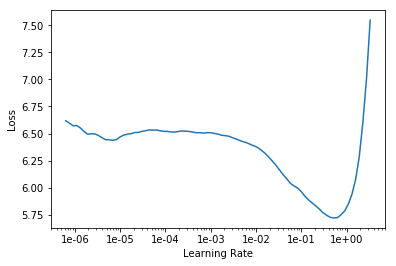

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.035402,2.718120,0.451382


In [35]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.878301,2.672573,0.456841


In [36]:
learn.save('lm-contracts-1')

In [37]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.858080,2.662608,0.459832


In [38]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.844009,2.636548,0.461848


In [39]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.812261,2.631253,0.463242


In [40]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.812895,2.627619,0.463571


In [41]:
learn.save('lm-contracts-2')

In [42]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.807194,2.637369,0.463782


In [43]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.812043,2.622832,0.465274


In [44]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.805906,2.618309,0.464394


In [45]:
learn.save('lm-contracts-3')

In [46]:
learn.predict('notwithstanding', 100, no_unk=True, temperature=1.1, min_p=0.001)

'notwithstanding anything , hereinafter adopted for the ancillary prosecution published determined change in sharps . as used herein minnesota law without regard to conflict of law rules principles of arizona rules . illinois left , in whole or british agent of illinois michigan law govern regulation rules of incorporation illinois . witness whereof thereunto and illinois law format . article xxup a. jr. michigan performable else michigan court national govern these day first santa clifton york as of june 27 , 2011 applicable principles regarding michigan law . xxup llc inc . granted as applied to submit to conflict between british'

In [47]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.827155,2.617922,0.465102


In [48]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.830638,2.613534,0.464847


In [49]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.812400,2.621349,0.465756


In [50]:
learn.save('lm-contracts-4')

In [52]:
learn.unfreeze()

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


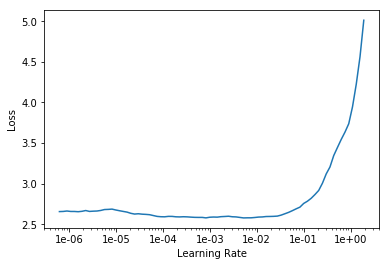

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.444747,2.353258,0.502102
2,2.095217,2.114243,0.541380


In [56]:
learn.save('lm-contracts-5')

In [57]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.211192,2.221710,0.521343
2,1.899677,2.072465,0.550002


In [58]:
learn.save('lm-contracts-6')

In [59]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.041009,2.164592,0.533516
2,1.748335,2.064763,0.553840


In [60]:
learn.save('lm-contracts-7')
learn.save_encoder('lm-contracts-encoder-7')

In [61]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.962554,2.163741,0.533685
2,1.615063,2.070282,0.554627


In [62]:
learn.save('lm-contracts-8')
learn.save_encoder('lm-contracts-encoder-8')

In [63]:
learn.predict('notwithstanding', 100, no_unk=True, temperature=1.1, min_p=0.001)

'notwithstanding the foregoing , and the xxmaj employers right to indemnification under xxmaj section 15 of the xxmaj employment xxmaj agreement with respect to all other xxmaj executive xxmaj expenses , the " xxmaj indemnification xxmaj obligations " ) , unless the xxmaj employers meeting a xxmaj notice to the xxmaj trust xxmaj trust , the xxmaj operating xxmaj lead xxmaj assignees ) or other xxmaj senior xxmaj debt xxmaj partners ( except as otherwise required to do so ) to comply with applicable xxmaj regulations , the xxmaj bankruptcy xxmaj court and xxmaj new xxmaj york xxmaj legal xxmaj knowledge'

In [64]:
learn.predict('successors', 5)

'successors and assigns , including any'

In [65]:
learn.predict('shall', 5)

'shall be deemed to be a'

In [66]:
learn.predict('may', 5)

'may assign this xxmaj agreement to'

In [67]:
learn.predict('consent', 5)

'consent to the assignment by the'

In [68]:
learn.predict('indemnify', 5)

'indemnify and hold xxmaj dr. xxmaj'

In [69]:
learn.predict('hold', 10)

'hold the non - breaching party receiving xxmaj party and xxmaj'

In [70]:
learn.predict('breach', 10)

'breach of covenant , or will while in paragraph metropcs indemnify'

In [71]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.850784,2.172463,0.536149
2,1.578478,2.080906,0.555969


In [72]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.781991,2.139250,0.540351
2,1.436057,2.080374,0.557310


In [73]:
learn.save('lm-contracts-9')
learn.save_encoder('lm-contracts-encoder-9')

In [74]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,1.713021,2.169981,0.539731
2,1.448774,2.101666,0.557274


In [75]:
learn.load('lm-contracts-9');

# Classifier

#### Create classification data bunch making sure to use the data_lm.vocab

In [77]:
data_clas = (TextDataBunch.from_csv(path, 'all-provisions.csv',
                              vocab=data_lm.vocab,
                              text_cols='snippet',
                              label_cols='label',
                              valid_pct=0.2))

In [78]:
data_clas.save('tmp_clas')

In [79]:
data_clas.show_batch()

text,target
"xxbos xxmaj this xxmaj agreement shall be governed by the laws of the state of xxmaj florida . xxup in xxup witness xxup whereof , the xxmaj parties hereto have caused their names to be subscribed and executed by the respective authorized officers on the dates indicated , effective as of the date first written above . xxup applied xxup digital xxup solutions , xxup inc . xxmaj by :",governing-law
"xxbos xxmaj this xxmaj letter may be executed in any number of counterparts and this has the same effect as if the signatures on the counterparts were on a single copy of this xxmaj letter . xxmaj please sign below in agreement of this xxmaj letter . xxmaj yours faithfully , xxmaj australia and xxmaj new xxmaj zealand xxmaj banking xxmaj group xxmaj limited xxmaj by : / s /",counterparts
xxbos xxmaj this letter and any non - contractual obligations arising out of or in connection with it are governed by xxmaj english law . xxup torm a / s for itself and as agent for each of the other xxmaj obligors party to each of the xxmaj agreements } / s / xxmaj mads xxmaj peter xxmaj zacho xxmaj by : xxmaj agreed and acknowledged by : xxup torm,governing-law
"xxbos xxmaj the company and each of its subsidiaries shall , to the maximum extent provided under applicable law , indemnify and hold xxmaj employee harmless from and against any expenses , including reasonable attorney 's fees , judgments , fines , settlements and other legally permissible amounts ( "" xxmaj losses "" ) , incurred in connection with any proceeding arising out of , or related to , xxmaj",indemnification
"xxbos xxmaj neither party may assign , delegate or otherwise transfer this xxmaj agreement or any of its rights or obligations hereunder without the other partys prior approval , which approval will not be unreasonably withheld or delayed . xxmaj any attempt to do so without such approval will be void . xxmaj subject to the limitations contained herein , xxup csg may assign this xxmaj agreement , upon notice",assignment


In [80]:
len(data_clas.train_ds)

14345

In [81]:
len(data_clas.valid_ds)

3587

In [82]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)

### Create classification learner using encodings from language model

In [93]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.5)
learn_clas.load_encoder('lm-contracts-encoder-9')
learn_clas.freeze()

In [94]:
learn_clas.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


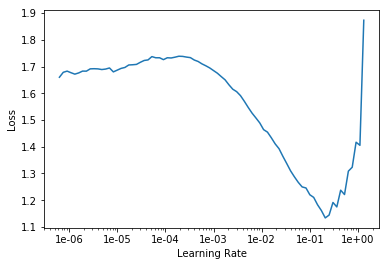

In [95]:
learn_clas.recorder.plot()

In [98]:
learn_clas.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.400464,0.206527,0.932534


In [99]:
learn_clas.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.390085,0.204486,0.928910
2,0.384188,0.191242,0.939783
3,0.397276,0.165645,0.944522
4,0.359644,0.170719,0.942570
5,0.356061,0.164166,0.943128


In [100]:
learn_clas.save('clas-contracts-1')

In [102]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.198079,0.162893,0.959297


In [103]:
learn_clas.save('clas-contracts-2')

In [104]:
learn_clas.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.249245,0.146266,0.962643
2,0.168718,0.093460,0.969612


In [105]:
learn_clas.save('clas-contracts-3')

In [106]:
learn_clas.freeze_to(-3)
learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.110685,0.096308,0.969334


In [107]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.121288,0.098809,0.968219
2,0.095810,0.099967,0.968776


In [108]:
learn_clas.save('clas-contracts-4')

In [109]:
learn_clas.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.100995,0.096406,0.969891
2,0.101353,0.097818,0.969334


In [110]:
learn_clas.save('clas-contracts-5')

In [111]:
learn_clas.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.090333,0.099109,0.969055
2,0.120555,0.097071,0.969612


In [112]:
learn_clas.save('clas-contracts-6')

## Interpretation

In [114]:
from fastai.vision import ClassificationInterpretation

In [115]:
interp = ClassificationInterpretation.from_learner(learn_clas)

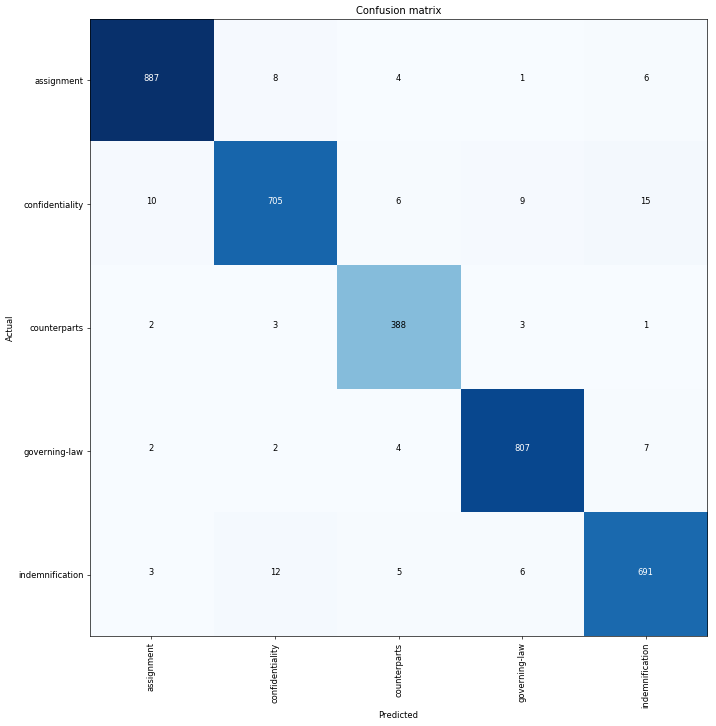

In [116]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [117]:
interp.most_confused()

[('confidentiality', 'indemnification', 15),
 ('indemnification', 'confidentiality', 12),
 ('confidentiality', 'assignment', 10),
 ('confidentiality', 'governing-law', 9),
 ('assignment', 'confidentiality', 8),
 ('governing-law', 'indemnification', 7),
 ('assignment', 'indemnification', 6),
 ('confidentiality', 'counterparts', 6),
 ('indemnification', 'governing-law', 6),
 ('indemnification', 'counterparts', 5),
 ('assignment', 'counterparts', 4),
 ('governing-law', 'counterparts', 4),
 ('counterparts', 'confidentiality', 3),
 ('counterparts', 'governing-law', 3),
 ('indemnification', 'assignment', 3),
 ('counterparts', 'assignment', 2),
 ('governing-law', 'assignment', 2),
 ('governing-law', 'confidentiality', 2)]

In [118]:
learn_clas.predict('This agreement is not assignaable.')

(Category assignment,
 tensor(0),
 tensor([0.7948, 0.0329, 0.0672, 0.1041, 0.0011]))

In [119]:
learn_clas.predict('This agreement may be executed in multiple counterparts each of which shall be deemed an original.')

(Category counterparts,
 tensor(2),
 tensor([4.1410e-08, 1.2112e-09, 1.0000e+00, 5.1746e-11, 3.0438e-09]))

In [125]:
# incorrect
# note that the counterparts class was the least represented in the data with 1920 samples versus 3-4k for the others

learn_clas.predict("Buyer must indemnify seller for any losses caused by Buyer's actions or inactions post-closing")

(Category counterparts,
 tensor(2),
 tensor([4.5902e-36, 3.6797e-21, 1.0000e+00, 5.1492e-34, 3.2065e-27]))

In [122]:
learn_clas.predict('This agreement is governed by the laws of California.')

(Category governing-law,
 tensor(3),
 tensor([1.8565e-06, 1.2060e-05, 2.5003e-06, 9.9996e-01, 2.8114e-05]))

In [123]:
learn_clas.predict('Buyer may not disclose any of the materials provided by Seller in connection with Buyer due diligence.')

(Category confidentiality,
 tensor(1),
 tensor([1.2607e-03, 9.9747e-01, 5.5175e-04, 2.2544e-04, 4.9173e-04]))

In [124]:
learn_clas.predict('Each party shall indemnify the other for any losses caused by the gross negligence of willful misconduct of the other party.')

(Category indemnification,
 tensor(4),
 tensor([1.0465e-05, 4.5394e-05, 6.5154e-06, 5.4194e-07, 9.9994e-01]))